<a href="https://colab.research.google.com/github/sonalgan/DeepLearning/blob/master/03HPE_DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functions to one-hot-encode the word and corresponding label


In [2]:

import numpy as np
from numpy import argmax
import re
import csv
import numpy as np
import pandas as pd
global alphabet
global maxlen
global N_LANG
N_LANG=10
maxlen=32
alphabet = "abcdefghijklmnopqrstuvwxyz"
def one_hot_encode(data):
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in data]
  onehot_encoded = []
  
  for value in integer_encoded:
    letter = np.zeros(len(alphabet))
    letter[value] = 1
    onehot_encoded.append(letter)
  while(len(onehot_encoded)<maxlen):
    letter = np.zeros(len(alphabet))
    onehot_encoded.append(letter)
  return  np.array(onehot_encoded)

def process(test_str):
  test_str=test_str.lower()
  test_str = re.sub(r'[^a-zA-Z ]', '', test_str)
  return test_str

def encode_labels(label):
  temp = np.zeros(N_LANG)
  temp[label-1] = 1
  return temp


def invert_one_hot_encode(data):
  int_to_char = dict((i, c) for i, c in enumerate(alphabet))
  inverted=""
  for ch in data:
    inverted+= int_to_char[argmax(ch)]

In [3]:
counts=[]
X=[]
Y=[]
df=pd.read_csv('https://github.com/404S-retr0/HPE_Project_Grp-8/blob/main/Data_Wordlists.csv?raw=true')
for word,lang in zip(df.WORDS,df.LANGAUAGE_VECTOR):
    counts.append(lang)
    if(pd.isna(word)):
      continue
    if(len(word)<=maxlen):
      X.append(one_hot_encode(process(word)))
      Y.append(encode_labels(int(lang)))



    



Data Distribution across labels

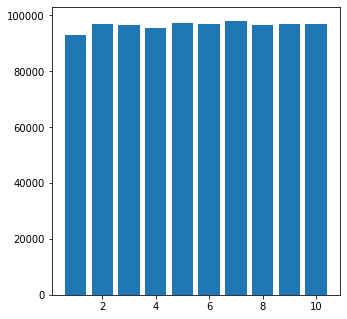

In [21]:
import matplotlib.pyplot as plt
from collections import Counter
#counts=Counter(counts)
fig=plt.figure(figsize=(4,4))
x,y=zip(*counts.items())
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [9]:
len(X_train)
len(X_test)

318428